## TAREA 4 - ANÁLISIS DE DATOS / UNAD
# K-means
- Estudiante: Pablo Andrés Suarez Rocha


## Importar librerías

In [177]:
#IMPORTAMOS LIBRERIAS 
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

# librerías de para implementar modelo Kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

In [179]:
#CARGAMOS EL DATASET
info = pd.read_csv('C:/Users/ANDRES_S/Desktop/Andrés/Octavo semestre UNAD/ANALISIS  DE DATOS/Tarea 4/Anexo 5 - Dataset Mall Customer Segmentation/Mall_Customers.csv')
info.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Análisis exploratorio de los datos.

In [182]:
# Descripción de los datos
info.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

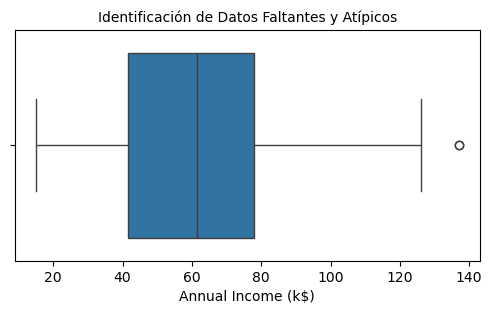

In [184]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=info['Annual Income (k$)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [186]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Age: ",info['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Annual Income (k$): ",info['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de Registros con cero en Spending Score (1-100): ",info['Spending Score (1-100)'].isin([0]).sum())

Cantidad de Registros con cero en Age:  0
Cantidad de Registros con cero en Annual Income (k$):  0
Cantidad de Registros con cero en Spending Score (1-100):  0


EN ESTE CASO NO HAY QUE RELLENAR VALORES FALTANTES.

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

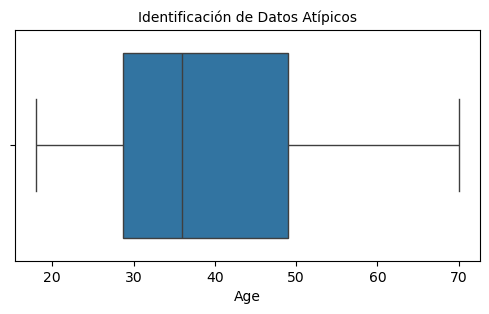

In [189]:
#IDENTIFICAR VALORES ATIPICOS AGE

plt.figure(figsize=(6, 3))
sns.boxplot(x=info['Age'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [191]:
#CANTIDAD DE DATOS ATIPICOS Age

nivel_minimo=18
nivel_maximo=70
Total_Atipicos=((info['Age']<nivel_minimo)|(info['Age']>nivel_maximo)).sum()
print(" - El total de datos atípicos es {}".format(Total_Atipicos))

 - El total de datos atípicos es 0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

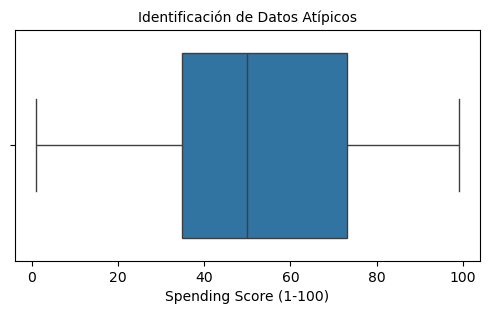

In [193]:
#IDENTIFICAR VALORES ATIPICOS  Spending Score (1-100).

plt.figure(figsize=(6, 3))
sns.boxplot(x=info['Spending Score (1-100)'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [195]:
#CANTIDAD DE DATOS ATIPICOS

nivel_minimo=1
nivel_maximo=100
Total_Atipicos=((info['Spending Score (1-100)']<nivel_minimo)|(info['Spending Score (1-100)']>nivel_maximo)).sum()
print(" - El total de datos atípicos es {}".format(Total_Atipicos))

 - El total de datos atípicos es 0


EN ESTE  CASO NO HAY VALORES ATIPICOS PARA FILTRAR.



In [198]:
#REVISIÓN DE DATOS
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


OBSERVAMOS QUE NO TENEMOS VALORES FALTANTES YA QUE TODAS LAS COLUMNAS CUENTAN CON 200 DATOS, DE IGUAL MANERA NO HAY VALORES ATIPICOS, POR LO QUE PODEMOS EMPEZAR A ENTRENAR EL MODELO.

## Selección de caracteristicas para entrenamiento del modelo.
Para este dataset, eliminaremos las columnas de "CustomerID" y "Gender" ya que son valores que no son relevantes para realizar la agrupación.

In [224]:
# ESTANDARIZAR LOS DATOS
scaler = StandardScaler()
scaled_data = scaler.fit_transform(info[['Annual Income (k$)', 'Age', 'Spending Score (1-100)']])

In [226]:
# FILTRAR COLUMNAS

info = info[["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [228]:
# REVISIÓN COLUMNAS SELECCIONADAS

info.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


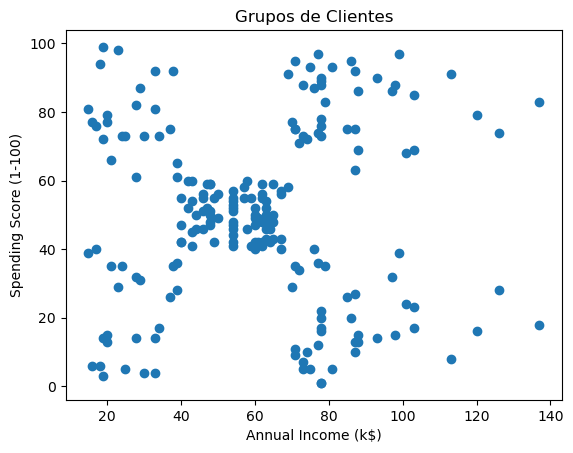

In [230]:
#GRAFICA PRE-AGRUPAMIENTO
plt.scatter(info['Annual Income (k$)'], info['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Grupos de Clientes')
plt.show()

# Configurar hiperparámetros para el entrenamiento del modelo.

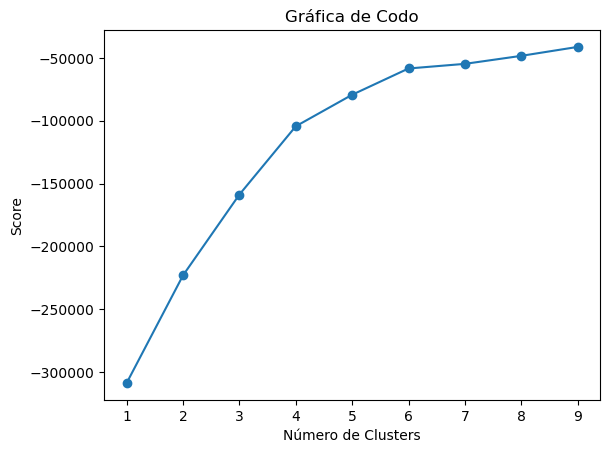

In [233]:
# GRÁFICA DE CODO PARA IDENTIFICAR VALOR DE LOS CLUSTERS (K)

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(info).score(info) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

In [235]:

# MODELO DE AGRUPAMIENTO CON K=6 como valor de clusters.

Modelo = KMeans(n_clusters=6, random_state=0)
Modelo.fit(info)
 

KMeans(n_clusters=6, random_state=0)

In [237]:
# AGREGAR COLUMNA "CLUSTER" A LA BASE DE DATOS PARA SABER EL NUMERO DE CADA GRUPO.

Modelo.labels_
info["Cluster"] = Modelo.labels_ 
print (info)

     Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0     19                  15                      39        2
1     21                  15                      81        5
2     20                  16                       6        2
3     23                  16                      77        5
4     31                  17                      40        2
..   ...                 ...                     ...      ...
195   35                 120                      79        1
196   45                 126                      28        3
197   32                 126                      74        1
198   32                 137                      18        3
199   30                 137                      83        1

[200 rows x 4 columns]


## Evaluar el desempeño del modelo
Metricas utilizadas:
- Coeficiente de Silhouette
- Índice de Calinski-Harabasz
- Indice Davies Bouldin

In [240]:
# PREPARAR METRICA PARA LA COLUMNA "CLUSTER"
Observaciones = len(info)
X = info.drop('Cluster', axis=1)
clusters = info['Cluster']

# CALCULAR METRICAS
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# TABLA PARA MOSTRAR RESULTADOS
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]
# MOSTRAR TABLA
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Numero de Observaciones  |         200         |
|  Coeficiente Silhouette  | 0.45095124469943243 |
| Indice Calinski Harabasz |  166.5857109469557  |
|  Indice Davies Bouldin   | 0.7515325100425705  |
+--------------------------+---------------------+


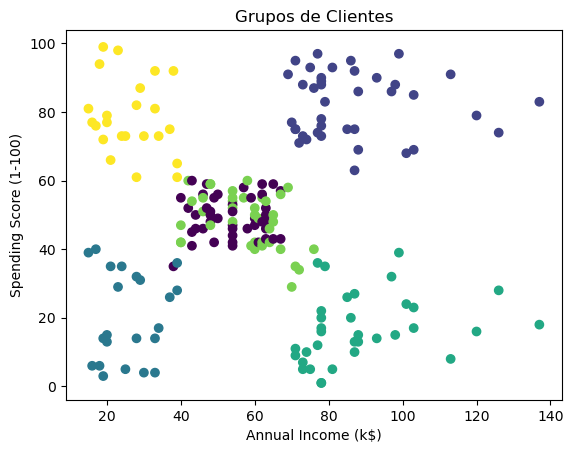

In [242]:
plt.scatter(info['Annual Income (k$)'], info['Spending Score (1-100)'], c=info['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Grupos de Clientes')
plt.show()

# Análisis de resultados.

## Podemos concluir que:

- Coeficiente de Silhouette: La puntuación de Silhouette es de aproximadamente 0.4509, aunque no se acerca a 1, todavía indica una buena cantidad de separación entre los grupos. Sugiere que los grupos son algo distintos, De igual forma, se probó distribuyendo los datos en más o menos grupos, pero los resultados no fueron tan buenos, en este caso, se distribuyeron los datos en 6 clusters lo que nos arrojó el mejor valor posible y cercano a 1.
- Índice de Calinski-Harabasz: La puntuación de Calinski Harabasz es de 166.5, que es aceptablemente, pero aún así todavía hay unos valores en el centro que muestran un margen de error más grande, sin embargo para la cantidad de datos con la que trabajamos es normal encotrar valores bajos en este indice.
- Indice Davies Bouldin: La puntuación de Davies Bouldin de  0.751 es una puntuación no tan favorable, ya que  muestra y evidencia una dispersión más grande en el centro, lo que no es tan bueno, sin embargo mantiene un coeficiente de silhouette aceptable.